# Importando Libs

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from joblib import dump, load
from matplotlib import pyplot as plt

# Importando os dados

In [2]:
data = pd.read_csv("sport_data.csv")

# Análise dos dados

In [3]:
data

,Age,Height,Sex,Sport
0,13,1.70,Male,Soccer
1,16,1.81,Male,Soccer
2,17,1.77,Male,Soccer
3,15,1.98,Male,Basketball
4,17,1.92,Male,Basketball
5,18,1.87,Male,Basketball
6,15,1.69,Male,Hockey
7,13,1.83,Male,Hockey
8,13,1.84,Male,Hockey
9,13,1.79,Female,Soccer


In [4]:
data.shape

(18, 4)

In [5]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,1.823889
std,1.917412,0.077013
min,13.000000,1.690000
25%,13.250000,1.775000
50%,15.000000,1.835000
75%,16.750000,1.870000
max,19.000000,1.980000


# Pré-processamento dos dados

In [6]:
data['Sex'].replace(['Female', 'Male'], [0,1], inplace=True)

In [7]:
data.head()

,Age,Height,Sex,Sport
0,13,1.70,1,Soccer
1,16,1.81,1,Soccer
2,17,1.77,1,Soccer
3,15,1.98,1,Basketball
4,17,1.92,1,Basketball


In [8]:
data.tail()

,Age,Height,Sex,Sport
13,17,1.88,0,Basketball
14,19,1.90,0,Basketball
15,13,1.85,0,Hockey
16,14,1.73,0,Hockey
17,14,1.87,0,Hockey


# Separando dados para treinamento e teste do Modelo

In [9]:
X = data.drop(columns=['Sport'])

In [10]:
X.head()

,Age,Height,Sex
0,13,1.70,1
1,16,1.81,1
2,17,1.77,1
3,15,1.98,1
4,17,1.92,1


In [11]:
y = data.drop(columns=['Age', 'Height', 'Sex'])

In [12]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Contruindo o modelo de Machine Learning

In [14]:
classifier = DecisionTreeClassifier()

In [15]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

# Testando o modelo

In [16]:
prediction_test = classifier.predict(X_test)

In [17]:
prediction_test

array(['Basketball', 'Basketball', 'Basketball', 'Soccer', 'Hockey',
       'Hockey'], dtype=object)

In [18]:
y_test

,Sport
5,Basketball
14,Basketball
4,Basketball
2,Soccer
15,Hockey
11,Soccer


# Verificando a eficácia do modelo

In [19]:
accuracy = accuracy_score(y_test, prediction_test)

In [20]:
accuracy

0.8333333333333334

In [22]:
new_user = classifier.predict([[21, 1.80, 1]])

/home/lucassilva/anaconda3/envs/pandasUdemy/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
new_user

array(['Soccer'], dtype=object)

# Salvando o Modelo

In [28]:
dump(classifier, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [30]:
classifier_matrix = confusion_matrix(y_test, prediction_test)
classifier_matrix

array([[3, 0, 0],
       [0, 1, 0],
       [0, 1, 1]])

/home/lucassilva/anaconda3/envs/pandasUdemy/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


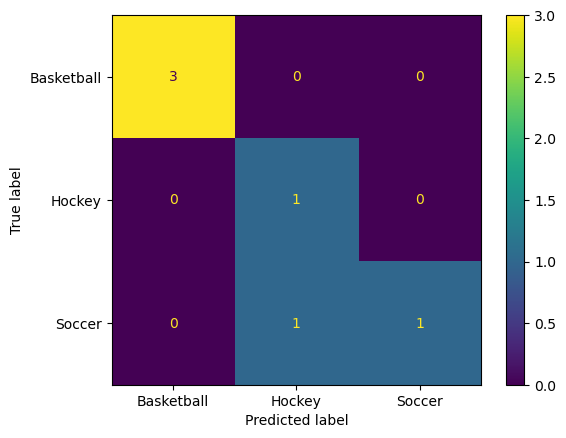

In [32]:
plot_confusion_matrix(classifier, X_test, y_test)

In [34]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         3
      Hockey       0.50      1.00      0.67         1
      Soccer       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.83      0.83      0.78         6
weighted avg       0.92      0.83      0.83         6

